In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


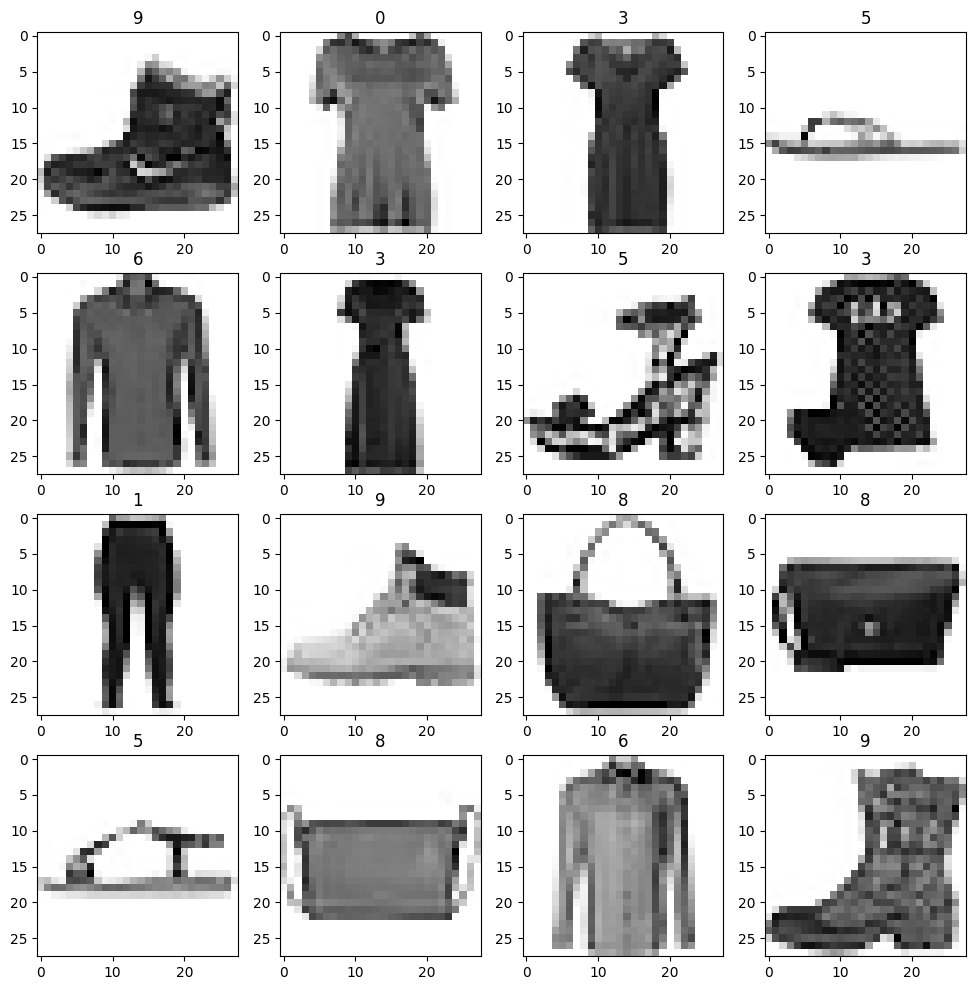

In [2]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
steps = 10
acum = 0
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(train_images[acum], cmap = 'Greys')
        ax[i][j].set_title(train_labels[acum])
        acum += steps

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, 5, input_shape = (28, 28, 1)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(64, 5),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(25, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 re_lu (ReLU)                (None, 24, 24, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          204864    
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                        

In [4]:
train_log = model.fit(train_images, train_labels, 
    epochs = 10,
    validation_data = (test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.5489 - accuracy: 0.8208 - val_loss: 0.3744 - val_accuracy: 0.8698
Epoch 2/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.3461 - accuracy: 0.8773 - val_loss: 0.3739 - val_accuracy: 0.8733
Epoch 3/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.3033 - accuracy: 0.8912 - val_loss: 0.3328 - val_accuracy: 0.8845
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2752 - accuracy: 0.8993 - val_loss: 0.3338 - val_accuracy: 0.8815
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2553 - accuracy: 0.9069 - val_loss: 0.3233 - val_accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.2428 - accuracy: 0.9112 - val_loss: 0.3302 - val_accuracy: 0.8918
Epoch 7/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2240 - accuracy: 0.9186 - val_loss: 0.3085 -

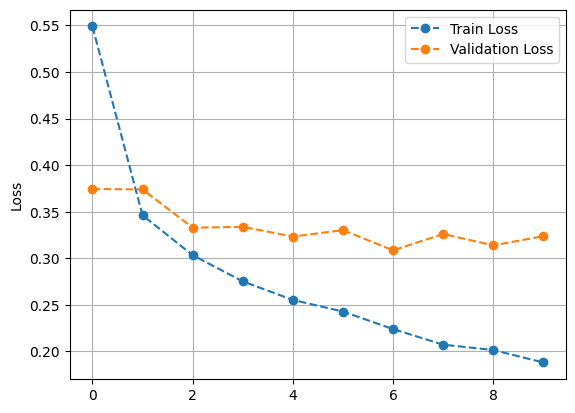

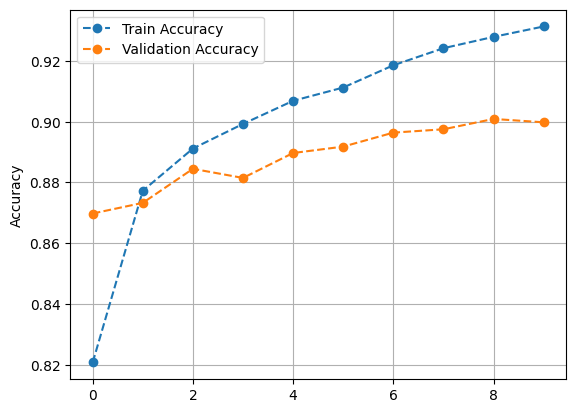

In [5]:
fig = plt.figure()
plt.plot(train_log.history['loss'], label = 'Train Loss', linestyle = '--', marker = 'o')
plt.plot(train_log.history['val_loss'], label = 'Validation Loss', linestyle = '--', marker = 'o')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure()
plt.plot(train_log.history['accuracy'], label = 'Train Accuracy', linestyle = '--', marker = 'o')
plt.plot(train_log.history['val_accuracy'], label = 'Validation Accuracy', linestyle = '--', marker = 'o')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy : ', "{:0.2%}".format(test_acc))
prediction = model.predict(test_images)


313/313 [==============================] - 3s 9ms/step - loss: 0.3237 - accuracy: 0.8998
Test accuracy :  89.98%
313/313 [==============================] - 3s 8ms/step


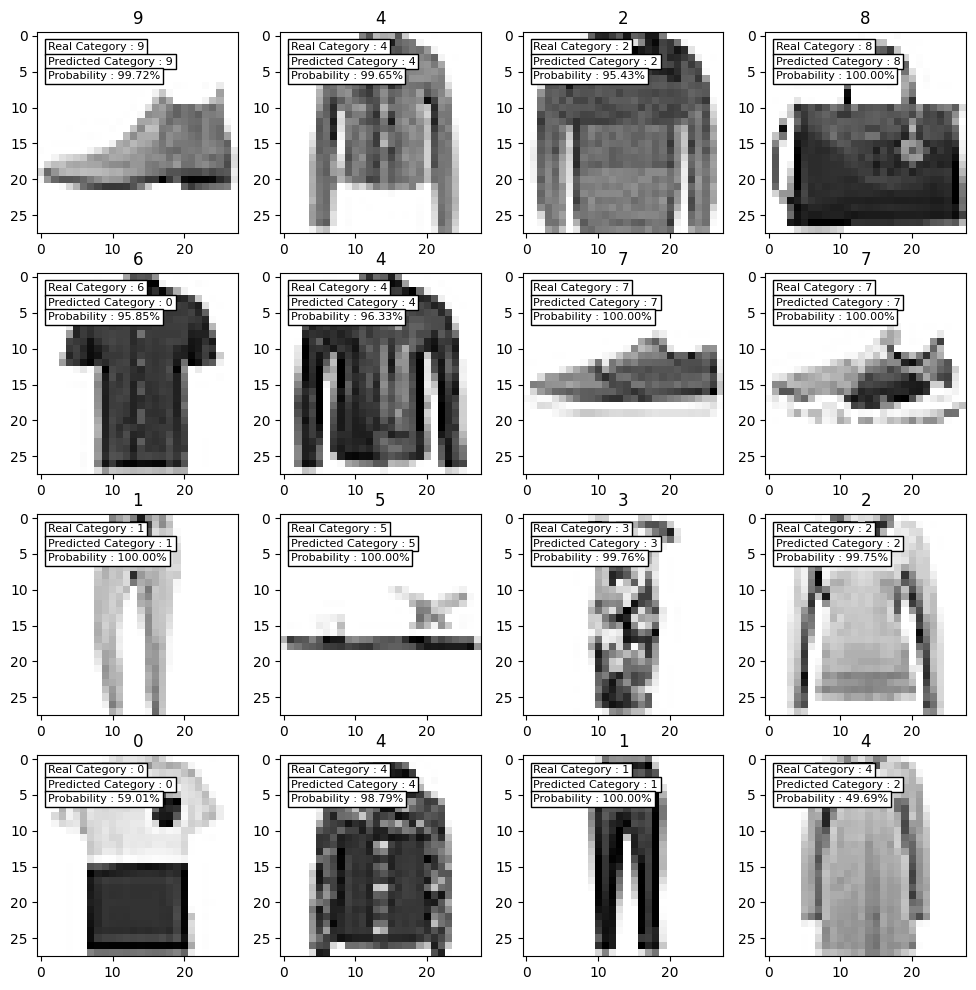

In [7]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
steps = 10
acum = 0
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(test_images[acum], cmap = 'Greys')
        ax[i][j].set_title(test_labels[acum])
        ax[i][j].text(1, 2, 'Real Category : ' + str(test_labels[acum]), fontsize = 8, bbox = {'facecolor': 'white', 'pad': 2})
        ax[i][j].text(1, 4, 'Predicted Category : ' + str(np.argmax(prediction[acum])), fontsize = 8, bbox = {'facecolor': 'white', 'pad': 2})
        ax[i][j].text(1, 6, 'Probability : ' + "{0:0.2%}".format(max(prediction[acum])), fontsize = 8, bbox = {'facecolor': 'white', 'pad': 2})
        acum += steps

Layers dimensions
(5, 5, 1, 128)
(128,)
(5, 5, 128, 64)
(64,)
(4096, 50)
(50,)
(50, 25)
(25,)
(25, 10)
(10,)
Weights of first convolutional layer


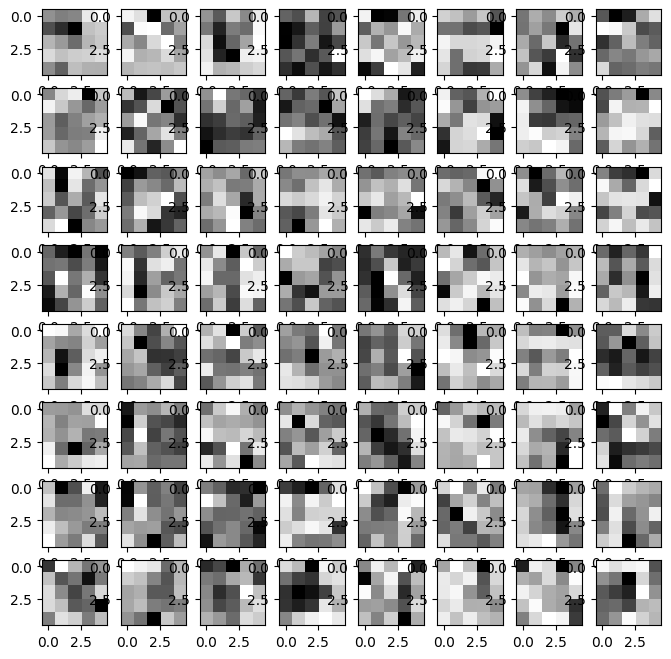

In [8]:
# print(type(model.weights[9])
# print(model.trainable_weights[9])
# print(dir(model.trainable_weights[9]))
print("Layers dimensions")
for i in range(10):
    print(model.trainable_variables[i].numpy().shape)

print("Weights of first convolutional layer")
fig, ax = plt.subplots(8, 8, figsize = (8, 8))
for i in range(8):
    for j in range(8):
        ax[i][j].imshow(model.trainable_variables[0].numpy()[:, :, 0, 8*i + j], cmap = 'Greys')

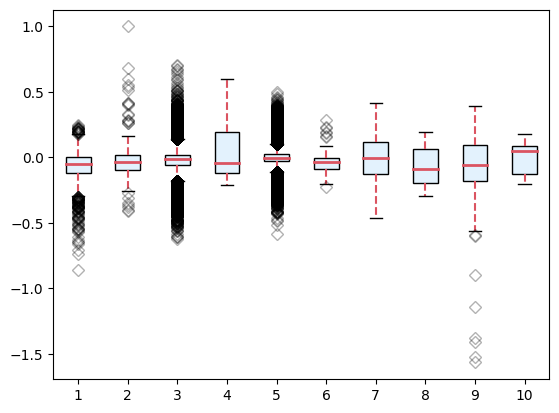

In [32]:
data = [model.trainable_variables[i].numpy().flatten() for i in range(len(model.trainable_variables))]
fig, ax = plt.subplots()
box_plot = ax.boxplot(data, patch_artist = True)

for whisker in box_plot['whiskers']:
    whisker.set(color ='#DB5461', linewidth = 1.5, linestyle ="--")

for flier in box_plot['fliers']:
    flier.set(marker ='D', color ='#686963', alpha = 0.3)

for median in box_plot['medians']:
    median.set(color ='#DB5461', linewidth = 2)

for patch in box_plot['boxes']:
    patch.set_facecolor('#E3F2FD')

In [40]:
def configure_box_plot(box_plot):
    for whisker in box_plot['whiskers']:
        whisker.set(color ='#DB5461', linewidth = 1.5, linestyle ="--")

    for flier in box_plot['fliers']:
        flier.set(marker ='D', color ='#686963', alpha = 0.3)

    for median in box_plot['medians']:
        median.set(color ='#DB5461', linewidth = 2)

    for patch in box_plot['boxes']:
        patch.set_facecolor('#E3F2FD')

0.99962986


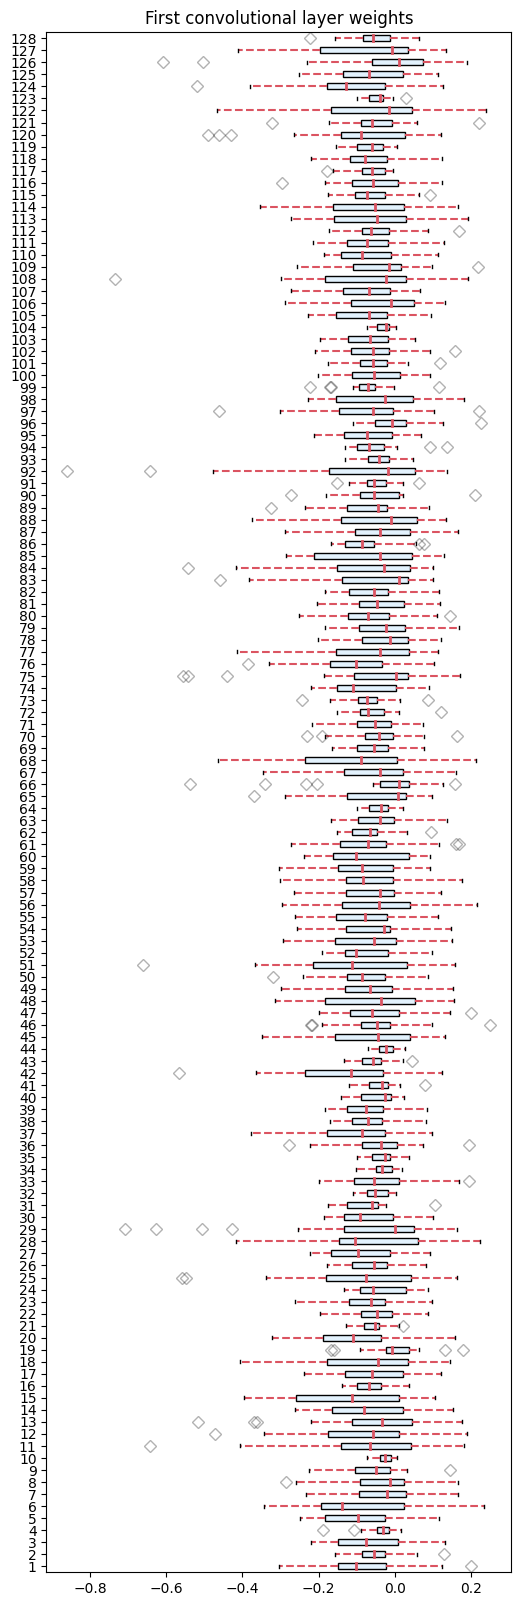

In [48]:
# First convolutional layer weights distribution
trainable_block = 0
data = [model.trainable_variables[trainable_block].numpy()[:, :, 0, i].flatten() for i in range(0, model.trainable_variables[trainable_block].numpy().shape[3], 1)]

fig, ax = plt.subplots(figsize = (6,20))
ax.set_title("First convolutional layer weights")
box_plot = ax.boxplot(data, patch_artist = True, vert = 0)
configure_box_plot(box_plot)

trainable_block = 1
# for i in range(model.trainable_variables[layer].numpy().shape[0]):
#     print(model.trainable_variables[layer].numpy()[i])

print(max(model.trainable_variables[trainable_block].numpy()))

In [90]:
# Test modifie some weight manually
model.get_weights()[0].shape
[foo, bias] = model.layers[0].get_weights()
print(bias[0:10])
lost_value = bias[0]
bias[0] = 10
print(lost_value)
print(bias[0:10])
model.layers[0].set_weights([foo, bias])
print(model.layers[0].get_weights()[1][:10])

[-0.06053242 -0.04154561 -0.0385844  -0.17016634 -0.37555686  0.05120629
 -0.11187572  0.04348682 -0.02642401 -0.05326657]
-0.06053242
[10.         -0.04154561 -0.0385844  -0.17016634 -0.37555686  0.05120629
 -0.11187572  0.04348682 -0.02642401 -0.05326657]
[10.         -0.04154561 -0.0385844  -0.17016634 -0.37555686  0.05120629
 -0.11187572  0.04348682 -0.02642401 -0.05326657]


In [92]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy : ', "{:0.2%}".format(test_acc))

313/313 [==============================] - 3s 10ms/step - loss: 0.3279 - accuracy: 0.8980
Test accuracy :  89.80%
[10.         -0.04154561 -0.0385844  -0.17016634 -0.37555686  0.05120629
 -0.11187572  0.04348682 -0.02642401 -0.05326657]


In [93]:
# Recover value
[foo, bias] = model.layers[0].get_weights()
print(bias[0:10])
bias[0] = lost_value
model.layers[0].set_weights([foo, bias])
print(model.layers[0].get_weights()[1][:10])

[10.         -0.04154561 -0.0385844  -0.17016634 -0.37555686  0.05120629
 -0.11187572  0.04348682 -0.02642401 -0.05326657]
[-0.06053242 -0.04154561 -0.0385844  -0.17016634 -0.37555686  0.05120629
 -0.11187572  0.04348682 -0.02642401 -0.05326657]


In [94]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy : ', "{:0.2%}".format(test_acc))

313/313 [==============================] - 4s 12ms/step - loss: 0.3237 - accuracy: 0.8998
Test accuracy :  89.98%
